# CASE STUDY

## CODE

### 1)Import Packages

In [2]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

In [3]:
#os.chdir("C:\Users\82103\Documents\Market Integration and Sector Coupling\pypsa\CASE STUDYexercise_0126")
excel_file_path = "C:\\Users\\82103\\Documents\\Market Integration and Sector Coupling\\pypsa\\2024-02-04\\data.xlsx"

### 2)Create a network and set Snapshots

In [4]:
# Create a new PyPSA network
network= pypsa.Network()
network.set_snapshots(range(8760))  # Solve for a year 365*24

### 3)Add Buses

In [5]:
# Read excel file which contains Non renewable generators data
bus_data = pd.read_excel(excel_file_path, sheet_name='buses')

In [6]:
for index,row in bus_data.iterrows():
    network.add(
    "Bus",
    name=row['bus'],
    v_nom=row['v_nom'],
    carrier=row['carrier'],
    x=row['x'],
    y=row['y']
)
    
network.buses

attribute   v_nom type          x          y carrier unit  v_mag_pu_set  \
Bus                                                                       
50Hertz     380.0       13.404954  52.520008      AC                1.0   
Amprion     380.0        6.953101  50.935173      AC                1.0   
TenneT      380.0        9.993682  53.551086      AC                1.0   
TransnetBW  380.0        9.057645  48.521637      AC                1.0   

attribute   v_mag_pu_min  v_mag_pu_max control generator sub_network  
Bus                                                                   
50Hertz              0.0           inf      PQ                        
Amprion              0.0           inf      PQ                        
TenneT               0.0           inf      PQ                        
TransnetBW           0.0           inf      PQ

### 4)Add generators

In [7]:
generators = pd.read_excel(excel_file_path,sheet_name="generators" )

network.madd(
"Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.carrier),
    p_nom=list(generators.p_nom2023),    
    #p_nom_max=list(generators.A2035),     
    #p_nom_max=list(generators.B2035),    
    p_nom_max=list(generators.C2035),    
    p_nom_extendable=list(generators.p_nom_extandable),
    marginal_cost=list(generators.marginal_cost),
    efficiency=list(generators.efficiency),
    capital_cost=list(generators.capital_cost)
    ) 

network.generators

bus  carrier    p_nom  p_nom_max  p_nom_extendable  \
Generator                                                              
50_p1         50Hertz  biomass   2055.0     1700.0             False   
50_p2         50Hertz     coal   1154.0        0.0             False   
50_p3         50Hertz  lignite   9273.0        0.0             False   
50_p4         50Hertz      gas   6330.0     6589.0             False   
50_p5         50Hertz     wind   1333.6     5133.6              True   
50_p6         50Hertz     wind  20756.0    46456.0              True   
50_p7         50Hertz    hydro   2793.0     4200.0             False   
50_p8         50Hertz    solar  20847.8    39247.8              True   
50_p9         50Hertz      res     59.0        0.0             False   
50_p10        50Hertz   nonres   1505.0      300.0             False   
50_p11        50Hertz  nuclear      0.0        0.0             False   
A_p1          Amprion  biomass   1607.0      800.0             False   
A_p2          Amprion     coal   6513.0        0.0             False   
A_p3          Amprion  lignite   8381.0        0.0             False   
A_p4          Amprion      gas  14216.0    10041.0             False   
A_p5          Amprion     wind      0.0        0.0             False   
A_p6          Amprion     wind  11620.0    23320.0              True   
A_p7          Amprion    hydro   2464.0      300.0             False   
A_p8          Amprion    solar  14701.0    28301.0              True   
A_p9          Amprion      res    272.0      400.0             False   
A_p10         Amprion   nonres   3489.0      800.0             False   
A_p11         Amprion  nuclear   1336.0        0.0             False   
Ten_p1         TenneT  biomass   3921.0     3100.0             False   
Ten_p2         TenneT     coal   5001.0        0.0             False   
Ten_p3         TenneT  lignite     38.0        0.0             False   
Ten_p4         TenneT      gas   9681.0     8694.0             False   
Ten_p5         TenneT     wind   7124.1    20624.1              True   
Ten_p6         TenneT     wind  23464.0    53164.0              True   
Ten_p7         TenneT    hydro   1576.0     1700.0             False   
Ten_p8         TenneT    solar  36090.8    67790.8              True   
Ten_p9         TenneT      res     90.0      100.0             False   
Ten_p10        TenneT   nonres   2754.0      500.0             False   
Ten_p11        TenneT  nuclear   1410.0        0.0             False   
TBW_p1     TransnetBW  biomass    884.0      600.0             False   
TBW_p2     TransnetBW     coal   5459.0        0.0             False   
TBW_p3     TransnetBW  lignite      0.0        0.0             False   
TBW_p4     TransnetBW      gas   1581.0     1229.0             False   
TBW_p5     TransnetBW     wind      0.0        0.0             False   
TBW_p6     TransnetBW     wind   1749.0     5049.0              True   
TBW_p7     TransnetBW    hydro   2447.0     1800.0             False   
TBW_p8     TransnetBW    solar  10185.0    19185.0              True   
TBW_p9     TransnetBW      res     19.0        0.0             False   
TBW_p10    TransnetBW   nonres   1210.0      100.0             False   
TBW_p11    TransnetBW  nuclear   1310.0        0.0             False   

           marginal_cost  efficiency  capital_cost control type  p_nom_mod  \
Generator                                                                    
50_p1               80.0        0.40        2000.0      PQ             0.0   
50_p2               25.0        0.30        5000.0      PQ             0.0   
50_p3               10.0        0.40        5000.0      PQ             0.0   
50_p4               50.0        0.40         800.0      PQ             0.0   
50_p5                0.0        1.00        2506.0      PQ             0.0   
50_p6                0.0        1.00        1182.0      PQ             0.0   
50_p7                3.0        0.75        2000.0      PQ             0.0   
50_

In [8]:
PV_timeseries=pd.read_excel(excel_file_path,sheet_name='PV_timeseries')
wind_timeseries=pd.read_excel(excel_file_path,sheet_name='wind_timeseries')

In [9]:
network.generators_t.p_max_pu["50_p8"] = list(PV_timeseries.pv_50)
network.generators_t.p_max_pu["50_p5"] = list(wind_timeseries.off_50)
network.generators_t.p_max_pu["50_p6"] = list(wind_timeseries.on_50)

network.generators_t.p_max_pu["A_p8"] = list(PV_timeseries.pv_A)
network.generators_t.p_max_pu["A_p6"] = list(wind_timeseries.on_A)

network.generators_t.p_max_pu["Ten_p8"] = list(PV_timeseries.pv_Ten)
network.generators_t.p_max_pu["Ten_p5"] = list(wind_timeseries.off_Ten)
network.generators_t.p_max_pu["Ten_p6"] = list(wind_timeseries.on_Ten)

network.generators_t.p_max_pu["TBW_p8"] = list(PV_timeseries.pv_TBW)
network.generators_t.p_max_pu["TBW_p6"] = list(wind_timeseries.on_TBW)

### 5)Add load

### Added by Parag

In [10]:
'''
You can add your all loads in a timeseries in columns and add load using network.add function like mentioned in the following code:
To verify whether the timeseries of the load data (p_set) is added properly, use:  `network.loads_t.p_set`  this command
'''

"""
# Read excel file which contains Non renewable generators data
def add_consumers(filename, index_col):
    try:
        load = pd.read_(filename,index_col=index_col)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return

    for load_name in list(load.columns.unique()):
        network.add("Load",
        f"{load_name}",
        bus=load_name,
        p_set=load[load_name].tolist()
        )

    return network.loads_t.p_set.head(5)    
"""

'\n# Read excel file which contains Non renewable generators data\ndef add_consumers(filename, index_col):\n    try:\n        load = pd.read_(filename,index_col=index_col)\n    except pd.errors.EmptyDataError:\n        print("The CSV file is empty.")\n        return\n\n    for load_name in list(load.columns.unique()):\n        network.add("Load",\n        f"{load_name}",\n        bus=load_name,\n        p_set=load[load_name].tolist()\n        )\n\n    return network.loads_t.p_set.head(5)    \n'

In [11]:
#demand = pd.read_excel(excel_file_path,sheet_name="load" )
#demand = pd.read_excel(excel_file_path,sheet_name="load_s1" )
#demand = pd.read_excel(excel_file_path,sheet_name="load_s2" )
demand = pd.read_excel(excel_file_path,sheet_name="load_s3" )


network.add("Load", "Amprion", bus="Amprion", p_set=demand["Amprion"])
network.add("Load", "TenneT", bus="TenneT", p_set=demand["TenneT"])
network.add("Load", "TransnetBW", bus="TransnetBW", p_set=demand["TransnetBW"])
network.add("Load", "50Hertz", bus="50Hertz", p_set=demand["50Hertz"])


<Axes: xlabel='snapshot', ylabel='MW'>

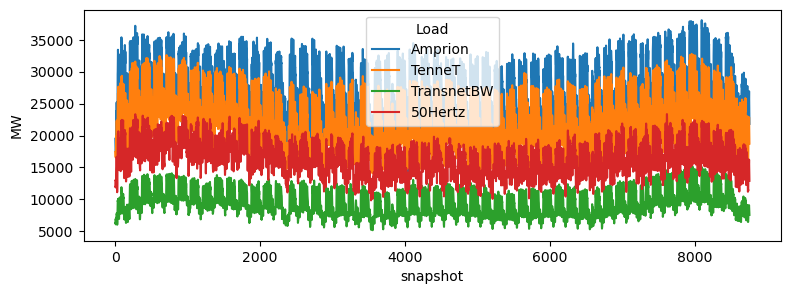

In [12]:
network.loads_t.p_set.plot(figsize=(9,3), ylabel="MW")

### 6)Add Lines

In [13]:
lines=pd.read_excel(excel_file_path,sheet_name='lines',header=0)
lines.head()

name        bus0        bus1  s_nom  efficiency  s_nom_extendable
0     0     50Hertz      TenneT   5000           1             False
1     1     Amprion      TenneT   5000           1             False
2     2      TenneT  TransnetBW   5000           1             False
3     3  TransnetBW     Amprion   5000           1             False

In [14]:
for X, row in lines.iterrows():
    network.add("Line",
    name=row['name'],
    bus0=row['bus0'],
    bus1=row['bus1'],
    s_nom=row['s_nom'],
    x=row['efficiency'],
    s_nom_extendable=row['s_nom_extendable'] 
    )
network.lines

attribute        bus0        bus1 type    x    r    g    b   s_nom  s_nom_mod  \
Line                                                                            
0             50Hertz      TenneT       1.0  0.0  0.0  0.0  5000.0        0.0   
1             Amprion      TenneT       1.0  0.0  0.0  0.0  5000.0        0.0   
2              TenneT  TransnetBW       1.0  0.0  0.0  0.0  5000.0        0.0   
3          TransnetBW     Amprion       1.0  0.0  0.0  0.0  5000.0        0.0   

attribute  s_nom_extendable  s_nom_min  s_nom_max  s_max_pu  capital_cost  \
Line                                                                        
0                     False        0.0        inf       1.0           0.0   
1                     False        0.0        inf       1.0           0.0   
2                     False        0.0        inf       1.0           0.0   
3                     False        0.0        inf       1.0           0.0   

attribute  build_year  lifetime  length carrier  terrain_factor  num_parallel  \
Line                                                                            
0                   0       inf     0.0                     1.0           1.0   
1                   0       inf     0.0                     1.0           1.0   
2                   0       inf     0.0                     1.0           1.0   
3                   0       inf     0.0                     1.0           1.0   

attribute  v_ang_min  v_ang_max sub_network  x_pu  r_pu  g_pu  b_pu  x_pu_eff  \
Line                                                                            
0               -inf        inf               0.0   0.0   0.0   0.0       0.0   
1               -inf        inf               0.0   0.0   0.0   0.0       0.0   
2               -inf        inf               0.0   0.0   0.0   0.0       0.0   
3               -inf        inf               0.0   0.0   0.0   0.0       0.0   

attribute  r_pu_eff  s_nom_opt  
Line                            
0               0.0        0.0  
1               0.0        0.0  
2               0.0        0.0  
3               0.0        0.0

### 7)Add links

links = pd.read_excel(excel_file_path, sheet_name='links')
links.head()

for X, row in links.iterrows():
    network.add("Link",
    name=row['name'],
    bus0=row['bus0'],
    bus1=row['bus1'],
    p_nom=row['p_nom'],
    p_nom_extendable=row['p_nom_extendable'],
    efficiency=row['efficiency'],
    capital_cost=row['capital_cost'] )
network.links

### 8)Add carriers

In [15]:
Carriers = pd.read_excel(excel_file_path,sheet_name="co2_emissions" )
Carriers.tail()

name  co2_emissions
5    hydro          0.000
6    solar          0.000
7      res          0.000
8   nonres          0.202
9  nuclear          0.000

In [16]:
for X, row in Carriers.iterrows():
    network.add(
        "Carrier",
        name=row['name'],
        co2_emissions=row['co2_emissions']
    )
network.carriers

attribute  co2_emissions color nice_name  max_growth  max_relative_growth
Carrier                                                                  
biomass            0.000                         inf                  0.0
coal               0.354                         inf                  0.0
lignite            0.364                         inf                  0.0
gas                0.202                         inf                  0.0
wind               0.000                         inf                  0.0
hydro              0.000                         inf                  0.0
solar              0.000                         inf                  0.0
res                0.000                         inf                  0.0
nonres             0.202                         inf                  0.0
nuclear            0.000                         inf                  0.0

network.add("Store", "battery storage1", bus="50Hertz", e_cyclic=True, e_nom=10000000.0)
network.add("Store", "battery storage2", bus="Amprion", e_cyclic=True, e_nom=10000000.0)
network.add("Store", "battery storage3", bus="Tennet", e_cyclic=True, e_nom=10000000.0)
network.add("Store", "battery storage4", bus="TransnetBW", e_cyclic=True, e_nom=10000000.0)

network.add(
    "StorageUnit",
    "battery storage1",
    bus="50Hertz",
    p_nom=100000000,
    max_hours=10,  # energy storage in terms of hours at full power
)

network.add(
    "StorageUnit",
    "battery storage2",
    bus="Amprion",
    p_nom=100000000,
    max_hours=10,  # energy storage in terms of hours at full power
)

network.add(
    "StorageUnit",
    "battery storage3",
    bus="Tennet",
    p_nom=100000000,
    max_hours=10,  # energy storage in terms of hours at full power
)

network.add(
    "StorageUnit",
    "battery storage4",
    bus="TransnetBW",
    p_nom=100000000,
    max_hours=10,  # energy storage in terms of hours at full power
)

### 9)CO2 emissions

In [17]:
network.add("GlobalConstraint", "co2_limit", sense="<=", constant=483000000)

## RESULTS

### 1)Optimize

In [18]:
network.optimize()

Index(['0', '1', '2', '3'], dtype='object', name='Line')
Index(['0', '1', '2', '3'], dtype='object', name='Line')
INFO:linopy.model: Solve problem using Glpk solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]
INFO:linopy.io: Writing time: 5.2s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\82103\AppData\Local\Temp\linopy-problem-r2wujjot.lp --output
 C:\Users\82103\AppData\Local\Temp\linopy-solve-3atul08q.sol
Reading problem data from 'C:\Users\82103\AppData\Local\Temp\linopy-problem-r2wujjot.lp'...
884781 rows, 420491 columns, 1534034 non-zeros
4854161 lines were read
GLPK Simplex Optimizer 5.0
884781 rows, 420491 columns, 1534034 non-zeros
Preprocessing...
114895 rows, 333904 columns, 668802 non-zeros
Scaling...
 A: min|aij| =  4.098e-06  max|aij| =  1.180e+00  ratio =  2.880e+05
GM: min|aij| =  1.426e-01  max|aij| =  7.013e+00  ratio =  4.918e+01
EQ: min|aij| =  2.042e-02  max|aij| =  1.000e+00  ratio =  4.897e+01
Constructing initial basis...
Size of triangular part is 114895
      0: obj =   5.370164005e+10 inf =   2.737e+08 (43800)
   1291: obj =   5.370141500e+10 inf =   2.647e+08 (42521)
   2601: obj =   5.370121357e+10 inf =   2.583e+08 (41222)
   3799: obj =   5.370121357e

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 420491 primals, 884781 duals
Objective: 4.01e+09
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Line-fix-s-lower, Line-fix-s-upper, Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

### 2)Marginal price

In [19]:
network.buses_t.marginal_price

Bus       50Hertz  Amprion  TenneT  TransnetBW
snapshot                                      
0             0.0      3.0     0.0         3.0
1             0.0      3.0     0.0         1.5
2             0.0      3.0     0.0         1.5
3             0.0      3.0     0.0         1.5
4             0.0      3.0     0.0         1.5
5             0.0      3.0     0.0         1.5
6             0.0      3.0     0.0         1.5
7             0.0      3.0     0.0         1.5
8             0.0      3.0     0.0         1.5
9             0.0      6.0     0.0         3.0
10            0.0      6.0     0.0         3.0
11            0.0     10.0     0.0         5.0
12            0.0     10.0     0.0         5.0
13            0.0     10.0     0.0         5.0
14            0.0     10.0     0.0         5.0
15            0.0     10.0     0.0         5.0
16            0.0     10.0     0.0         5.0
17            0.0     25.0     0.0        12.5
18            0.0     10.0     0.0         5.0
19            0.0     10.0     0.0         5.0
20            0.0     10.0     0.0         5.0
21            0.0     10.0     0.0         5.0
22            0.0     10.0     0.0         5.0
23            0.0      8.0     0.0         4.0
24            0.0      3.0     0.0         1.5
25            3.0      3.0     3.0         3.0
26            3.0      3.0     3.0         3.0
27            0.0      3.0     3.0         3.0
28            0.0      3.0     3.0         3.0
29            0.0      3.0     3.0         3.0
30            0.0     10.0     3.0         6.5
31            0.0     10.0     6.0         8.0
32            0.0     10.0     3.0         6.5
33            0.0     10.0     0.0         5.0
34            0.0     10.0     0.0         5.0
35            0.0     10.0     0.0         5.0
36            0.0     25.0     0.0        12.5
37            0.0     25.0     0.0        12.5
38            0.0     25.0     0.0        12.5
39            0.0     25.0     0.0        12.5
40            0.0     25.0     0.0        12.5
41            0.0     25.0     0.0        12.5
42            0.0     25.0     0.0        12.5
43            0.0     25.0     0.0        12.5
44            0.0     25.0     0.0        12.5
45            0.0     25.0     0.0        12.5
46            0.0     25.0     0.0        12.5
47            0.0     10.0     0.0         5.0
48            0.0     10.0     0.0         5.0
49            0.0     10.0     0.0         5.0
50            0.0     10.0     0.0         5.0
51            0.0     10.0     0.0         5.0
52            3.0     13.0     3.0         8.0
53           10.0     25.0    25.0        25.0
54           10.0     25.0    25.0        25.0
55           10.0     40.0    40.0        40.0
56           10.0     40.0    40.0        40.0
57           10.0     40.0    40.0        40.0
58           10.0     25.0    25.0        25.0
59           10.0     25.0    25.0        25.0
60           10.0     25.0    25.0        25.0
61           10.0     25.0    25.0        25.0
62           10.0     25.0    25.0        25.0
63           25.0     25.0    25.0        25.0
64           40.0     40.0    40.0        40.0
65           40.0     40.0    40.0        40.0
66           25.0     25.0    25.0        25.0
67           25.0     25.0    25.0        25.0
68           10.0     25.0    10.0        25.0
69            3.0     10.0     3.0         8.0
70            0.0     10.0     0.0         8.0
71            0.0     10.0     0.0         8.0
72            0.0     10.0     0.0         5.0
73            0.0      8.0     0.0         4.0
74            0.0      6.0     0.0         3.0
75            0.0      8.0     0.0         4.0
76            0.0     10.0     0.0         5.0
77            0.0     10.0     0.0         5.0
78            0.0     10.0     0.0         5.0
79            0.0     10.0     0.0         5.0
80            0.0     10.0     0.0         5.0
81            0.0     10.0     0.0         5.0
82            0.0     10.0     0.0         5.0
83   

<Axes: xlabel='Generator', ylabel='MW'>

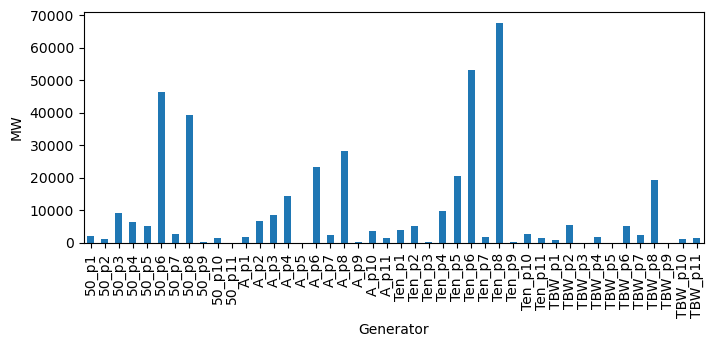

In [20]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

<Axes: xlabel='Generator', ylabel='Total generation MW'>

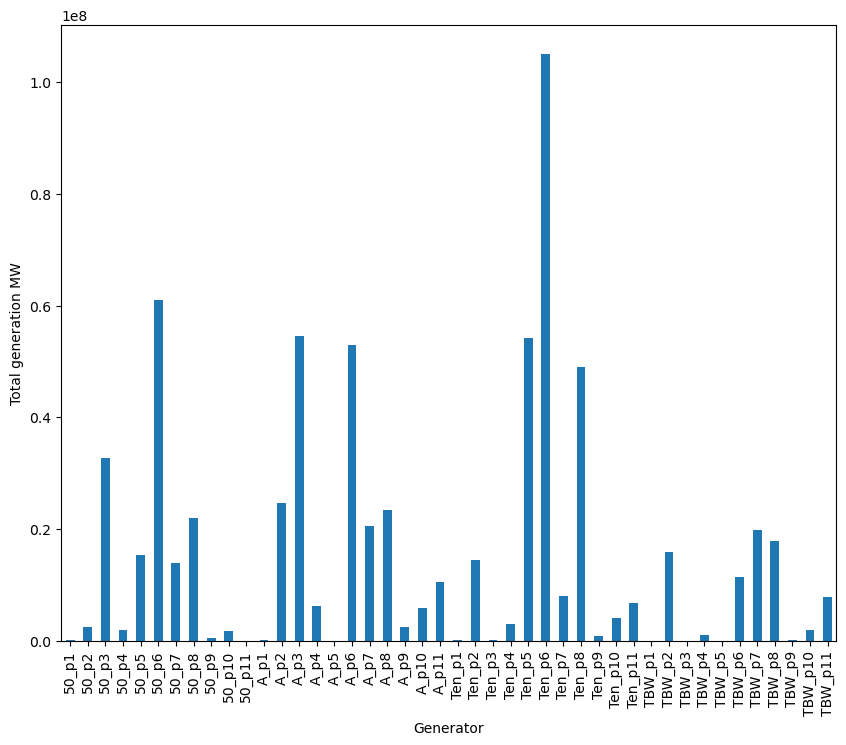

In [21]:
network.generators_t.p.sum().plot.bar(ylabel="Total generation MW")

### 3)Lines snapshot

In [22]:
network.lines_t.p0

Line                0            1           2            3
snapshot                                                   
0        -5000.000000 -5000.000000  5000.00000     0.000000
1        -5000.000000 -5000.000000  4856.81000   143.189000
2        -5000.000000 -5000.000000  4707.96000   292.036000
3        -5000.000000 -5000.000000  4708.22000   291.782000
4        -5000.000000 -5000.000000  4684.37000   315.635000
5        -5000.000000 -5000.000000  4648.84000   351.165000
6        -5000.000000 -5000.000000  4689.99000   310.009000
7        -5000.000000 -5000.000000  4610.99000   389.013000
8        -5000.000000 -5000.000000  4753.58000   246.419000
9        -5000.000000 -5000.000000  3444.91000  1555.090000
10       -5000.000000 -5000.000000  3674.69000  1325.310000
11       -5000.000000 -5000.000000  2410.31000  2589.690000
12       -5000.000000 -5000.000000  2103.55000  2896.450000
13       -5000.000000 -5000.000000  1966.81000  3033.190000
14       -5000.000000 -5000.000000  2618.75000  2381.250000
15       -5000.000000 -5000.000000  3439.23000  1560.770000
16       -5000.000000 -5000.000000  4234.23000   765.773000
17       -5000.000000 -5000.000000  3886.54000  1113.460000
18       -4823.590000 -5000.000000  4105.42000   894.582000
19       -4310.590000 -5000.000000  3959.34000  1040.660000
20       -4531.530000 -5000.000000  3669.78000  1330.220000
21       -5000.000000 -5000.000000  3481.98000  1518.020000
22       -4831.370000 -5000.000000  3373.95000  1626.050000
23       -3036.350000 -5000.000000  3121.17000  1878.830000
24         790.171000 -5000.000000  4232.65000   767.348000
25        3545.840000 -3899.800000  2403.43000  1496.360000
26        5000.000000 -3841.780000  2705.05000  1136.730000
27        5000.000000 -4402.500000  3217.32000  1185.170000
28        5000.000000 -3452.300000  2359.89000  1092.400000
29        5000.000000 -4680.880000  3146.39000  1534.490000
30        5000.000000 -5000.000000  3852.54000  1147.460000
31        5000.000000 -5000.000000  3837.25000  1162.750000
32        5000.000000 -5000.000000  4650.68000   349.316000
33        5000.000000 -5000.000000  4676.74000   323.264000
34       -1644.750000 -5000.000000  4171.43000   828.574000
35       -5000.000000 -5000.000000  3739.18000  1260.820000
36       -5000.000000 -5000.000000  2588.75000  2411.250000
37       -5000.000000 -5000.000000  2555.92000  2444.080000
38       -4385.850000 -5000.000000  3244.24000  1755.760000
39         311.358000 -5000.000000  3836.50000  1163.500000
40        3033.460000 -5000.000000  4119.15000   880.853000
41        3405.460000 -5000.000000  4243.33000   756.675000
42        -384.598000 -5000.000000  3812.65000  1187.350000
43       -3622.210000 -5000.000000  3768.65000  1231.350000
44       -4747.100000 -5000.000000  3807.49000  1192.510000
45       -5000.000000 -5000.000000  3951.24000  1048.760000
46       -2790.420000 -5000.000000  3990.14000  1009.860000
47       -1696.050000 -5000.000000  4453.94000   546.064000
48         383.040000 -5000.000000  4351.70000   648.304000
49         840.261000 -5000.000000  4357.26000   642.740000
50        1562.480000 -5000.000000  4305.08000   694.924000
51        3351.050000 -5000.000000  4370.27000   629.734000
52        4630.820000 -5000.000000  3986.36000  1013.640000
53        5000.000000 -4742.770000  4083.08000   659.689000
54        5000.000000 -4066.880000  4044.57000    22.313100
55        5000.000000 -4334.010000  1601.73000  2732.280000
56        5000.000000 -4212.010000  1560.61000  2651.400000
57        5000.000000 -2802.660000   845.56400  1957.100000
58        5000.000000 -4736.630000  2444.29000  2292.340000
59        5000.000000 -3771.070000  1050.54000  2720.530000
60        5000.000000 -3454.340000  1123.62000  2330.720000
61        5000.000000 -3425.850000  2570.92000   854.930000
62        5000.000000 -3920.380000  3121.86000   798.523000
63        3263.720000 -3772.150000  1948.79000  1823.360000
64        2247.440000 -2771.730000   743

### 4)Gen assign

In [23]:
gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus         carrier
50Hertz     biomass        4.401721
            coal         267.921552
            gas          207.007144
            hydro       1582.321513
            lignite     3736.940144
            nonres       195.201054
            nuclear        0.000000
            res           56.391294
            solar       2514.125787
            wind        8707.737495
Amprion     biomass        2.689551
            coal        2818.749380
            gas          701.621921
            hydro       2338.684349
            lignite     6221.658330
            nonres       671.890123
            nuclear     1190.011125
            res          271.571092
            solar       2665.627980
            wind        6031.837463
TenneT      biomass        2.150908
            coal        1644.164897
            gas          336.180140
            hydro        913.372033
            lignite       17.894964
            nonres       465.932922
            nuclear      769.334788
        

In [24]:
g_sum = network.generators_t.p.sum()
numbers_list = g_sum[:].tolist()
print(numbers_list)
bus1 = numbers_list[:11]
bus2 = numbers_list[11:22]
bus3 = numbers_list[22:33]
bus4 = numbers_list[33:44]
print(len(bus1))
print(len(bus2))
print(len(bus3))
print(len(bus4))

bus1[1]


[38559.077, 2346992.79576, 32735595.65833, 1813382.5818999999, 15281528.719091, 60998251.73472, 13861136.45709, 22023741.89191, 493987.73329999996, 1709961.23401, 0.0, 23560.469399999998, 24692244.567112003, 54501726.972307995, 6146208.0277, 0.0, 52838896.176199995, 20486874.898459, 23350901.105745, 2378962.766, 5885757.473560001, 10424497.455620002, 18841.951, 14402884.50162, 156759.886982, 2944938.0297000003, 54222703.810651995, 105045124.736, 8001139.0089, 48987591.412659, 774360.0, 4081572.4011, 6739372.740982, 14035.707, 15851009.56672, 0.0, 954515.1078, 0.0, 11372675.01659, 19787620.512629997, 17810564.527732, 166060.0, 1891451.7169, 7744003.69828]
11
11
11
11


2346992.79576

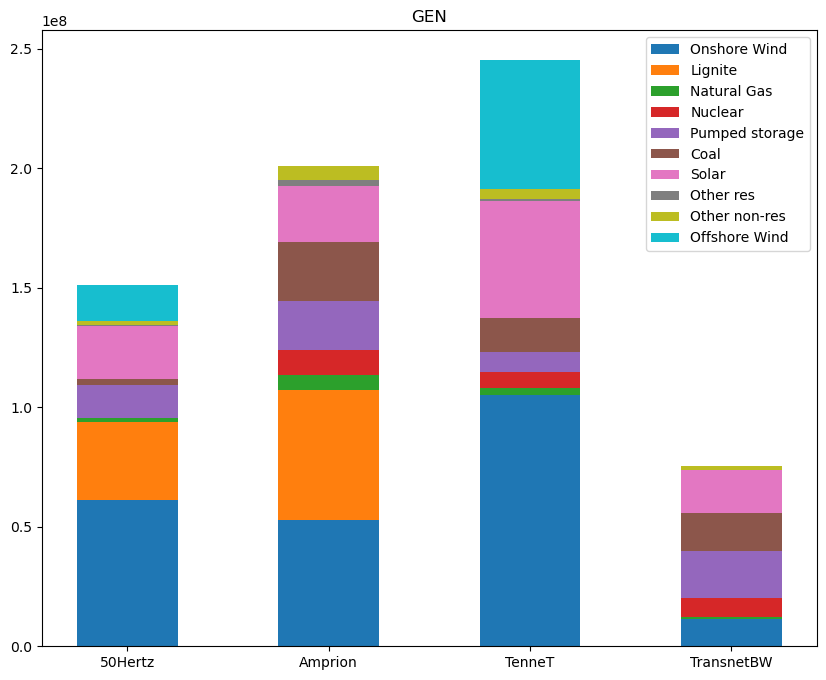

In [25]:

TSO = (
    "50Hertz",
    "Amprion",
    "TenneT",
    "TransnetBW",
)

category = {
#    "Biomass": np.array([bus1[0], bus2[0], bus3[0], bus4[0]]),
    "Onshore Wind": np.array([bus1[5], bus2[5], bus3[5], bus4[5]]),
    "Lignite" : np.array([bus1[2], bus2[2], bus3[2], bus4[2]]),
    "Natural Gas": np.array([bus1[3], bus2[3], bus3[3], bus4[3]]),
    "Nuclear": np.array([bus1[10], bus2[10], bus3[10], bus4[10]]),
    "Pumped storage": np.array([bus1[6], bus2[6], bus3[6], bus4[6]]),
    "Coal" : np.array([bus1[1], bus2[1], bus3[1], bus4[1]]),
    "Solar": np.array([bus1[7], bus2[7], bus3[7], bus4[7]]),
    "Other res": np.array([bus1[8], bus2[8], bus3[8], bus4[8]]),
    "Other non-res": np.array([bus1[9], bus2[9], bus3[9], bus4[9]]),
    "Offshore Wind": np.array([bus1[4], bus2[4], bus3[4], bus4[4]]),
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, category in category.items():
    p = ax.bar(TSO, category, width, label=boolean, bottom=bottom)
    bottom += category

ax.set_title("GEN")
ax.legend(loc="upper right")

plt.show()

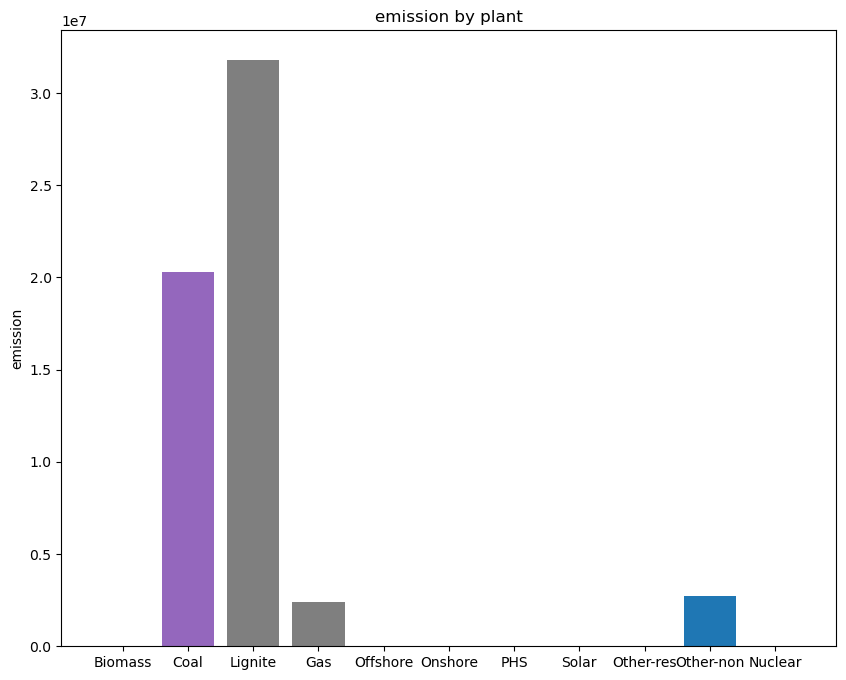

In [65]:
co = [0, 0.354, 0.364, 0.202, 0, 0, 0, 0, 0, 0.202, 0]
arr1 = np.array(bus1)
arr2 = np.array(bus2)
arr3 = np.array(bus3)
arr4 = np.array(bus4)

arr0 = arr1 + arr2 + arr3 + arr4

arrco = np.array(co)

res_arr = np.multiply(arr0, arrco)
emiss = res_arr.tolist()

fig, ax = plt.subplots()

plants = ['Biomass', 'Coal', 'Lignite', 'Gas', 'Offshore', 'Onshore', 'PHS', 'Solar', 'Other-res', 'Other-non', 'Nuclear']
#bar_labels = ['blue', 'purple', 'gray', 'gray','blue','blue','blue','blue','blue','blue','pink']
bar_colors = ['tab:blue', 'tab:purple', 'tab:gray', 'tab:gray','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:pink',]

ax.bar(plants, emiss, color=bar_colors)

ax.set_ylabel('emission')
ax.set_title('emission by plant')
#ax.legend(title='color')


plt.show()

### 5)Flow

In [27]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name
Line       0       10
           1       10
           2       10
           3       10
dtype: int64

### 6)Geo. graph

c:\Users\82103\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



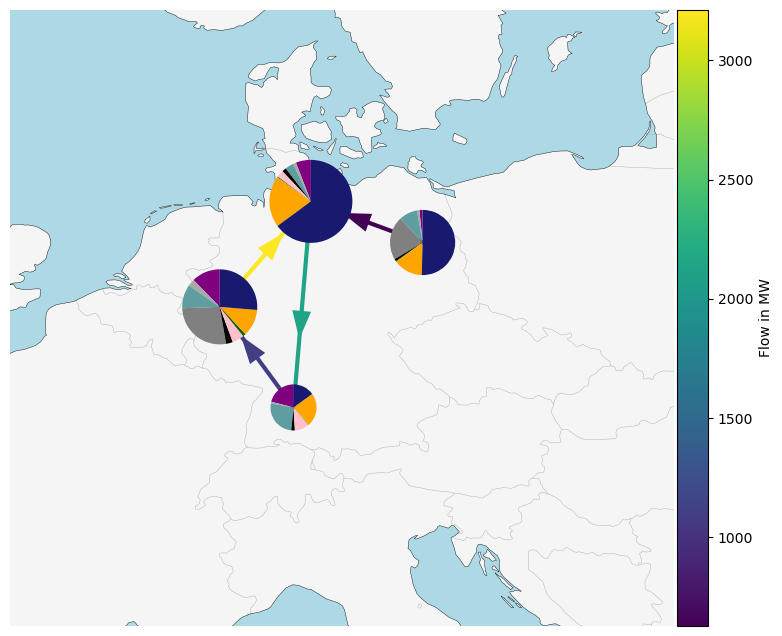

In [28]:
plot_graph=network.plot(
    bus_sizes=gen/20000,
    bus_colors={"biomass":"green","coal":"purple","gas":"darkgray","hydro":"cadetblue","lignite":"gray","nuclear":"pink","nonres":"black","res":"darkgreen","solar":"orange","wind":"midnightblue"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

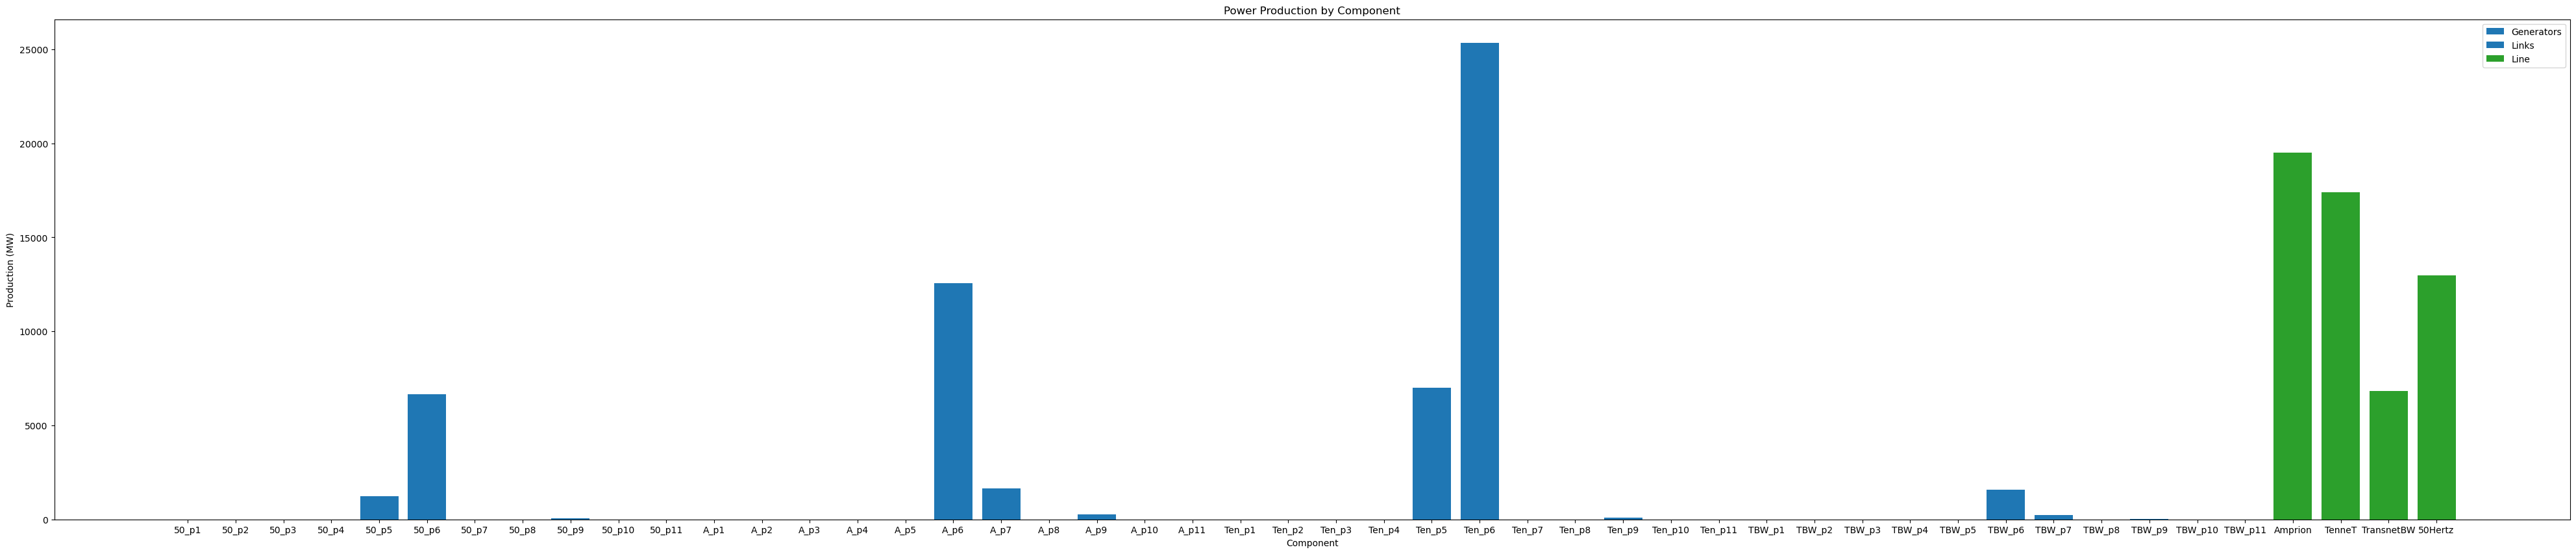

In [29]:
# Your DataFrame df
df = pd.concat(
    [
        network.generators_t.p.loc[0],
        network.links_t.p0.loc[0],
        network.loads_t.p.loc[0],
    ],
    keys=["Generators", "Links", "Line"],
    names=["Component", "index"],
).reset_index(name="Production")

# Plotting using PyPSA
fig, ax = plt.subplots(figsize=(50, 10))

# Plot generators
df_generators = df[df["Component"] == "Generators"]
ax.bar(df_generators["index"], df_generators["Production"], label="Generators")

# Plot links
df_links = df[df["Component"] == "Links"]
ax.bar(df_links["index"], df_links["Production"], label="Links")

# Plot loads
df_loads = df[df["Component"] == "Line"]
ax.bar(df_loads["index"], df_loads["Production"], label="Line")

# Customize the plot
ax.set_xlabel("Component")
ax.set_ylabel("Production (MW)")
ax.set_title("Power Production by Component")
ax.legend()

# Show the plot
plt.show()


## ADDITIONAL

### -)Storages

In [30]:
"""
def add_stores(filename, header):
    try:
        stores = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index, row in stores.iterrows():
        network.add(
            "Store",
            name=row['name'],
            e_initial=row['e_initial'],
            e_nom=row['e_nom'],
            marginal_cost=row['marginal_cost'],
            bus=row['bus'],
            e_cyclic=row['e_cyclic'],
            e_nom_extendable=row['e_nom_extendable'],
        )
    return network.stores
"""

'\ndef add_stores(filename, header):\n    try:\n        stores = pd.read_csv(filename, header=header)\n    except pd.errors.EmptyDataError:\n        print("The CSV file is empty.")\n        return\n        \n    for index, row in stores.iterrows():\n        network.add(\n            "Store",\n            name=row[\'name\'],\n            e_initial=row[\'e_initial\'],\n            e_nom=row[\'e_nom\'],\n            marginal_cost=row[\'marginal_cost\'],\n            bus=row[\'bus\'],\n            e_cyclic=row[\'e_cyclic\'],\n            e_nom_extendable=row[\'e_nom_extendable\'],\n        )\n    return network.stores\n'

add_stores('stores.csv',0)

### -)Global constraints

In [31]:
#network.lopf()